<a href="https://colab.research.google.com/github/Sid-Oya/DS-Unit-2-Linear-Models/blob/master/Sidoney_DS_212_Regression2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 2, Sprint 1, Module 2*

---

# Regression 2

## Assignment

You'll continue to **predict how much it costs to rent an apartment in NYC,** using the dataset from renthop.com.

- [ ] Do train/test split. Use data from April & May 2016 to train. Use data from June 2016 to test.
- [ ] Engineer at least two new features. (See below for explanation & ideas.)
- [ ] Fit a linear regression model with at least two features.
- [ ] Get the model's coefficients and intercept.
- [ ] Get regression metrics RMSE, MAE, and $R^2$, for both the train and test data.
- [ ] What's the best test MAE you can get? Share your score and features used with your cohort on Slack!
- [ ] As always, commit your notebook to your fork of the GitHub repo.


#### [Feature Engineering](https://en.wikipedia.org/wiki/Feature_engineering)

> "Some machine learning projects succeed and some fail. What makes the difference? Easily the most important factor is the features used." — Pedro Domingos, ["A Few Useful Things to Know about Machine Learning"](https://homes.cs.washington.edu/~pedrod/papers/cacm12.pdf)

> "Coming up with features is difficult, time-consuming, requires expert knowledge. 'Applied machine learning' is basically feature engineering." — Andrew Ng, [Machine Learning and AI via Brain simulations](https://forum.stanford.edu/events/2011/2011slides/plenary/2011plenaryNg.pdf) 

> Feature engineering is the process of using domain knowledge of the data to create features that make machine learning algorithms work. 

#### Feature Ideas
- Does the apartment have a description?
- How long is the description?
- How many total perks does each apartment have?
- Are cats _or_ dogs allowed?
- Are cats _and_ dogs allowed?
- Total number of rooms (beds + baths)
- Ratio of beds to baths
- What's the neighborhood, based on address or latitude & longitude?

## Stretch Goals
- [ ] If you want more math, skim [_An Introduction to Statistical Learning_](http://faculty.marshall.usc.edu/gareth-james/ISL/ISLR%20Seventh%20Printing.pdf),  Chapter 3.1, Simple Linear Regression, & Chapter 3.2, Multiple Linear Regression
- [ ] If you want more introduction, watch [Brandon Foltz, Statistics 101: Simple Linear Regression](https://www.youtube.com/watch?v=ZkjP5RJLQF4)
(20 minutes, over 1 million views)
- [ ] Add your own stretch goal(s) !

In [ ]:
%%capture
import sys

# If you're on Colab:
if 'google.colab' in sys.modules:
    DATA_PATH = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Applied-Modeling/master/data/'
    !pip install category_encoders==2.*

# If you're working locally:
else:
    DATA_PATH = '../data/'
    
# Ignore this Numpy warning when using Plotly Express:
# FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning, module='numpy')

In [ ]:
import numpy as np
import pandas as pd

# Read New York City apartment rental listing data
df = pd.read_csv(DATA_PATH+'apartments/renthop-nyc.csv')
assert df.shape == (49352, 34)

# Remove the most extreme 1% prices,
# the most extreme .1% latitudes, &
# the most extreme .1% longitudes
df = df[(df['price'] >= np.percentile(df['price'], 0.5)) & 
        (df['price'] <= np.percentile(df['price'], 99.5)) & 
        (df['latitude'] >= np.percentile(df['latitude'], 0.05)) & 
        (df['latitude'] < np.percentile(df['latitude'], 99.95)) &
        (df['longitude'] >= np.percentile(df['longitude'], 0.05)) & 
        (df['longitude'] <= np.percentile(df['longitude'], 99.95))]

In [ ]:
df

,bathrooms,bedrooms,created,description,display_address,latitude,longitude,price,street_address,interest_level,elevator,cats_allowed,hardwood_floors,dogs_allowed,doorman,dishwasher,no_fee,laundry_in_building,fitness_center,pre-war,laundry_in_unit,roof_deck,outdoor_space,dining_room,high_speed_internet,balcony,swimming_pool,new_construction,terrace,exclusive,loft,garden_patio,wheelchair_access,common_outdoor_space
0,1.5,3,2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,40.7145,-73.9425,3000,792 Metropolitan Avenue,medium,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1.0,2,2016-06-12 12:19:27,,Columbus Avenue,40.7947,-73.9667,5465,808 Columbus Avenue,low,1,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1.0,1,2016-04-17 03:26:41,"Top Top West Village location, beautiful Pre-w...",W 13 Street,40.7388,-74.0018,2850,241 W 13 Street,high,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1.0,1,2016-04-18 02:22:02,Building Amenities - Garage - Garden - fitness...,East 49th Street,40.7539,-73.9677,3275,333 East 49th Street,low,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1.0,4,2016-04-28 01:32:41,Beautifully renovated 3 bedroom flex 4 bedroom...,West 143rd Street,40.8241,-73.9493,3350,500 West 143rd Street,low,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49347,1.0,2,2016-06-02 05:41:05,"30TH/3RD, MASSIVE CONV 2BR IN LUXURY FULL SERV...",E 30 St,40.7426,-73.9790,3200,230 E 30 St,medium,1,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
49348,1.0,1,2016-04-04 18:22:34,"HIGH END condo finishes, swimming pool, and ki...",Rector Pl,40.7102,-74.0163,3950,225 Rector Place,low,1,1,0,1,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1
49349,1.0,1,2016-04-16 02:13:40,Large Renovated One Bedroom Apartment with Sta...,West 45th Street,40.7601,-73.9900,2595,341 West 45th Street,low,1,1,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
49350,1.0,0,2016-04-08 02:13:33,Stylishly sleek studio apartment with unsurpas...,Wall Street,40.7066,-74.0101,3350,37 Wall Street,low,1,1,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
df.dtypes

bathrooms               float64
bedrooms                  int64
created                  object
description              object
display_address          object
latitude                float64
longitude               float64
price                     int64
street_address           object
interest_level           object
elevator                  int64
cats_allowed              int64
hardwood_floors           int64
dogs_allowed              int64
doorman                   int64
dishwasher                int64
no_fee                    int64
laundry_in_building       int64
fitness_center            int64
pre-war                   int64
laundry_in_unit           int64
roof_deck                 int64
outdoor_space             int64
dining_room               int64
high_speed_internet       int64
balcony                   int64
swimming_pool             int64
new_construction          int64
terrace                   int64
exclusive                 int64
loft                      int64
garden_p

## Train the data


In [ ]:
train = df [(df ['created'] >= '2016-04-01 00:00:00') & (df ['created'] <= 	'2016-05-31 23:59:59')]
test = df [(df ['created'] >= '2016-06-01 00:00:00') & (df ['created'] <= 	'2016-06-30 23:59:59')]

In [ ]:
train.shape, test.shape

((31844, 34), (16973, 34))

## Establish baseline


In [ ]:
# average price of rentals in nyc

train['price'].mean()

3575.604007034292

In [ ]:
# arrange Y target vectors

target = 'price'
y_train = train[target]
y_test =  test[target]
y_train.shape, y_test.shape

((31844,), (16973,))

In [ ]:
#get mean baseline

print('mean baseline - using zero features')
guess = y_train.mean()
guess

mean baseline - using zero features


3575.604007034292

In [ ]:
# train error

from sklearn.metrics import mean_absolute_error
y_pred = [guess] * len(y_train)
y_pred
mae = mean_absolute_error(y_train, y_pred)
print(f'train error (price): {mae:.2f} percentage points')

train error (price): 1201.88 percentage points


In [ ]:
 # test error

y_pred = [guess] * len(y_test)
y_pred
mae = mean_absolute_error(y_test, y_pred)
print(f'test error (price): {mae:.2f} percentage points')

test error (price): 1197.71 percentage points


Train 1st Feature


In [ ]:
import plotly.express as px

In [ ]:
'''px.scatter(
    train,
    x = 'latitude',
    y = 'price',
    text = 'created',
    title = 'NYC Rentals',
    trendline = 'ols', # ordinary least squares
)'''

"px.scatter(\n    train,\n    x = 'latitude',\n    y = 'price',\n    text = 'created',\n    title = 'NYC Rentals',\n    trendline = 'ols', # ordinary least squares\n)"

In [ ]:
# step 1. import the appropriate estimator class for sklearn

from sklearn.linear_model import LinearRegression

In [ ]:
# step 2. instantiate this class

model = LinearRegression()

In [ ]:
# step. 3 arrange x features matrices (already did y target vectors)

features = ['latitude']
X_train = train[features]
X_test = test[features]
print(f'Liner Regression, dependent on: {features}') 
X_train.shape, X_test.shape

Liner Regression, dependent on: ['latitude']


((31844, 1), (16973, 1))

In [ ]:
# step 4. fit the model

model.fit(X_train, y_train)
y_pred = model.predict(X_train)
mae = mean_absolute_error(y_train, y_pred)
print(f'train error: {mae:.2f} percentage points')

train error: 1198.87 percentage points


In [ ]:
#step 5. apply the model to new data

y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print(f'test error: {mae:.2f} percentage points')

test error: 1195.62 percentage points


Train 2nd feature

In [ ]:
px.scatter_3d(
    train,
    x = 'latitude',
    y = 'bedrooms',
    z= 'price',
    title = 'Rentals NYC'

)

In [ ]:
features = ['latitude', 'bedrooms']
print(f'Linear Regression, dependent on: {features}')

X_train = train[features]
X_test = test[features]
X_train.shape, X_test.shape

Linear Regression, dependent on: ['latitude', 'bedrooms']


((31844, 2), (16973, 2))

In [ ]:
# fit the model

model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# apply model to new data

y_pred = model.predict(X_train)
y_pred

mae = mean_absolute_error(y_train, y_pred)
print(f'train error: {mae:.2f} percentage points')

train error: 963.51 percentage points


In [ ]:
y_pred = model.predict(X_test)
y_pred

mae = mean_absolute_error(y_test, y_pred)
print(f'train error: {mae:.2f} percentage points')

train error: 983.33 percentage points


In [ ]:
import itertools
import numpy as np
import plotly.express as px
import plotly.graph_objs as go
from sklearn.linear_model import LinearRegression

def regression_3d(df, x, y, z, num=100, **kwargs):
    """
    Visualize linear regression in 3D: 2 features + 1 target
    
    df : Pandas DataFrame
    x : string, feature 1 column in df
    y : string, feature 2 column in df
    z : string, target column in df
    num : integer, number of quantiles for each feature
    """
    
    # Plot data
    fig = px.scatter_3d(df, x, y, z, **kwargs)
    
    # Fit Linear Regression
    features = [x, y]
    target = z
    model = LinearRegression()
    model.fit(df[features], df[target])    
    
    # Define grid of coordinates in the feature space
    xmin, xmax = df[x].min(), df[x].max()
    ymin, ymax = df[y].min(), df[y].max()
    xcoords = np.linspace(xmin, xmax, num)
    ycoords = np.linspace(ymin, ymax, num)
    coords = list(itertools.product(xcoords, ycoords))
    
    # Make predictions for the grid
    predictions = model.predict(coords)
    Z = predictions.reshape(num, num).T
    
    # Plot predictions as a 3D surface (plane)
    fig.add_trace(go.Surface(x=xcoords, y=ycoords, z=Z))
    
    return fig

In [ ]:
regression_3d(
    train,
    x = 'latitude',
    y = 'bedrooms',
    z = 'price',
    title = 'NYC Rentals'
)

In [ ]:
model.intercept_, model.coef_

(79587.31500843282, array([-1897.38137042,   855.81468397]))

In [ ]:
beta0 = model.intercept_
beta1, beta2 = model.coef_
print(f'y = {beta0} + {beta1}x1 + {beta2}x2') 

y = 79587.31500843282 + -1897.3813704177653x1 + 855.8146839711181x2


In [ ]:
print('Intercept', model.intercept_)
coefficients = pd.Series(model.coef_, features)
print(coefficients.to_string())

Intercept 79587.31500843282
latitude   -1897.381370
bedrooms     855.814684


In [ ]:
model.predict([[0,0]])

array([79587.31500843])

In [ ]:
model.predict([[1,0]])

array([77689.93363802])

In [ ]:
model.predict([[1,0]]) - model.predict([[0,0]])

array([-1897.38137042])

In [ ]:
model.predict([[2,0]]) - model.predict([[1,0]])

array([-1897.38137042])

In [ ]:
model.predict([[2,100]])

array([161374.02066471])

In [ ]:
model.predict([[2,100]]) - model.predict([[2,0]])

array([85581.46839711])

In [ ]:
model.predict

<bound method LinearModel.predict of LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)>

In [ ]:
from matplotlib.patches import Rectangle
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def squared_errors(df, feature, target, m, b):
    """
    Visualize linear regression, with squared errors,
    in 2D: 1 feature + 1 target.
    
    Use the m & b parameters to "fit the model" manually.
    
    df : Pandas DataFrame
    feature : string, feature column in df
    target : string, target column in df
    m : numeric, slope for linear equation
    b : numeric, intercept for linear requation
    """
    
    # Plot data
    fig = plt.figure(figsize=(7,7))
    ax = plt.axes()
    df.plot.scatter(feature, target, ax=ax)
    
    # Make predictions
    x = df[feature]
    y = df[target]
    y_pred = m*x + b
    
    # Plot predictions
    ax.plot(x, y_pred)
    
    # Plot squared errors
    xmin, xmax = ax.get_xlim()
    ymin, ymax = ax.get_ylim()
    scale = (xmax-xmin)/(ymax-ymin)
    for x, y1, y2 in zip(x, y, y_pred):
        bottom_left = (x, min(y1, y2))
        height = abs(y1 - y2)
        width = height * scale
        ax.add_patch(Rectangle(xy=bottom_left, width=width, height=height, alpha=0.1))
    
    # Print regression metrics
    mse = mean_squared_error(y, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y, y_pred)
    r2 = r2_score(y, y_pred)
    print('Mean Squared Error:', mse)
    print('Root Mean Squared Error:', rmse)
    print('Mean Absolute Error:', mae)
    print('R^2:', r2)

Mean Squared Error: 3105028.217891242
Root Mean Squared Error: 1762.1090255404863
Mean Absolute Error: 1201.8811133682555
R^2: 0.0


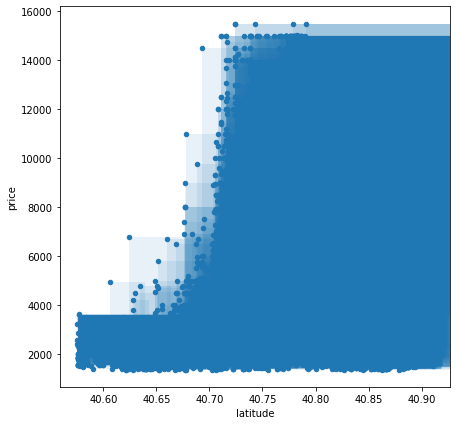

In [ ]:
feature = 'latitude'
squared_errors(train, feature, target, m=0, b=y_train.mean())

Mean Squared Error: 14715090.355091736
Root Mean Squared Error: 3836.025332957505
Mean Absolute Error: 3407.3517768370807
R^2: -3.739116466092984


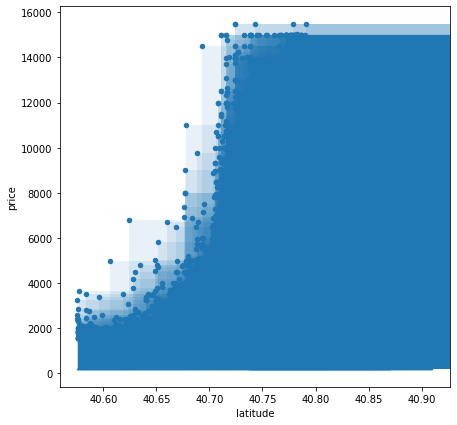

In [ ]:
squared_errors(train, feature, target, m=3, b=46)